In [1]:
# import libraries 
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain
import sys
import inspect
# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

# import local scripts
import src.classes_analysis as simulation
import src.models as model
import src.graph as graph
import src.interventions as interventions


%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

In [25]:
# calculate the desired interventions and get the intervention differences
df_diffusion,_,graph,_ = simulation.get_classes_intervention_results()

Generating Graph...
###############################################################
Graph generation starting!
Label: gen
Formula: None
###############################################################

Nodes removed for not being in the selected classes: # 454
###############################################################
Graph generated successfuly!
###############################################################

460.36013174057007


/Users/bojansimoski/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/bojansimoski/dev/eur/ABM-PA/src/classes_analysis.py:636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_rates['perc_sni']=success_rates.iloc[:, [1,2,3]

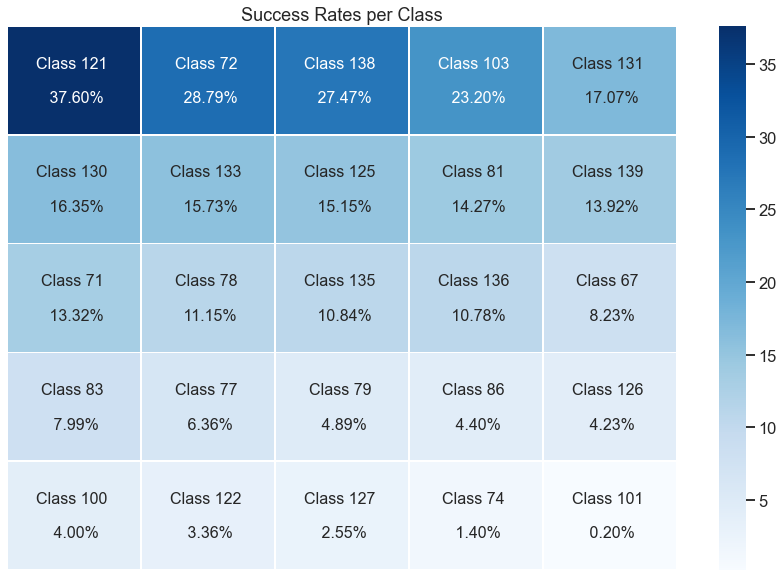

,ID,perc_indegree,perc_betweenness,perc_closeness,perc_random,perc_nointervention,perc_sni
19,129,-6.27,-6.08,-4.49,-5.92,-5.88,-5.613333
12,101,0.94,-0.62,0.27,-0.51,-0.96,0.196667
4,74,2.34,-1.69,3.56,0.23,0.58,1.403333
18,127,1.91,3.83,1.91,2.48,2.66,2.550000
15,122,3.36,3.36,3.36,2.19,2.28,3.360000
11,100,4.4,3.19,4.4,2.73,1.81,3.996667
17,126,5.49,2.95,4.25,3.3,2.8,4.230000
10,86,3.25,4.17,5.79,5.15,5.46,4.403333
7,79,4.24,5.42,5.01,4.92,5.29,4.890000
5,77,4.57,8.32,6.19,5.11,4.27,6.360000


In [46]:
indif, success_rates=simulation.get_interventions_differences(class_dict=df_diffusion)
simulation.fancy_heatmap(success_rates)
success_rates.loc['avg'] = success_rates.mean()
simulation.df_to_excel(success_rates,filename='successrates.xlsx',sheet='SuccessRates')
success_rates

In [35]:
indif.head()

,ID,networkType,percent,model,optimized,d0_optimized,d364_optimized,outdegree,d0_outdegree,d364_outdegree,...,e_random,noint,perc_outdegree,perc_indegree,perc_betweenness,perc_closeness,perc_maxpal,perc_minpal,perc_random,perc_nointervention
1,67,gen,15,diffusion,,,,0.186409,1.62891,1.815319,...,,7.69,11.44,7.04,10.6,7.04,5.87,6.78,7.58,7.69
2,71,gen,15,diffusion,,,,0.195626,1.46826,1.663886,...,,14.93,13.32,13.22,13.51,13.22,20.49,13.72,14.95,14.93
3,72,gen,15,diffusion,,,,0.415732,1.60213,2.017862,...,,28.35,25.95,26.31,30.95,29.12,31.38,27.02,27.77,28.35
4,74,gen,15,diffusion,,,,-0.013032,1.525804,1.512772,...,,0.58,-0.85,2.34,-1.69,3.56,-2.22,0.08,0.23,0.58
5,77,gen,15,diffusion,,,,0.14089,1.859578,2.000468,...,,4.27,7.58,4.57,8.32,6.19,4.72,5.31,5.11,4.27


In [36]:
graph

In [40]:
# get_class_graphs(graph,writeToFile=True,label='gen')

In [53]:
graph

In [56]:
for sg in graph:
    simulation.get_class_graphs(graph=sg)

In [ ]:
# simulation.get_intervention_per_child_plots(classes_results=df_diffusion)

create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****


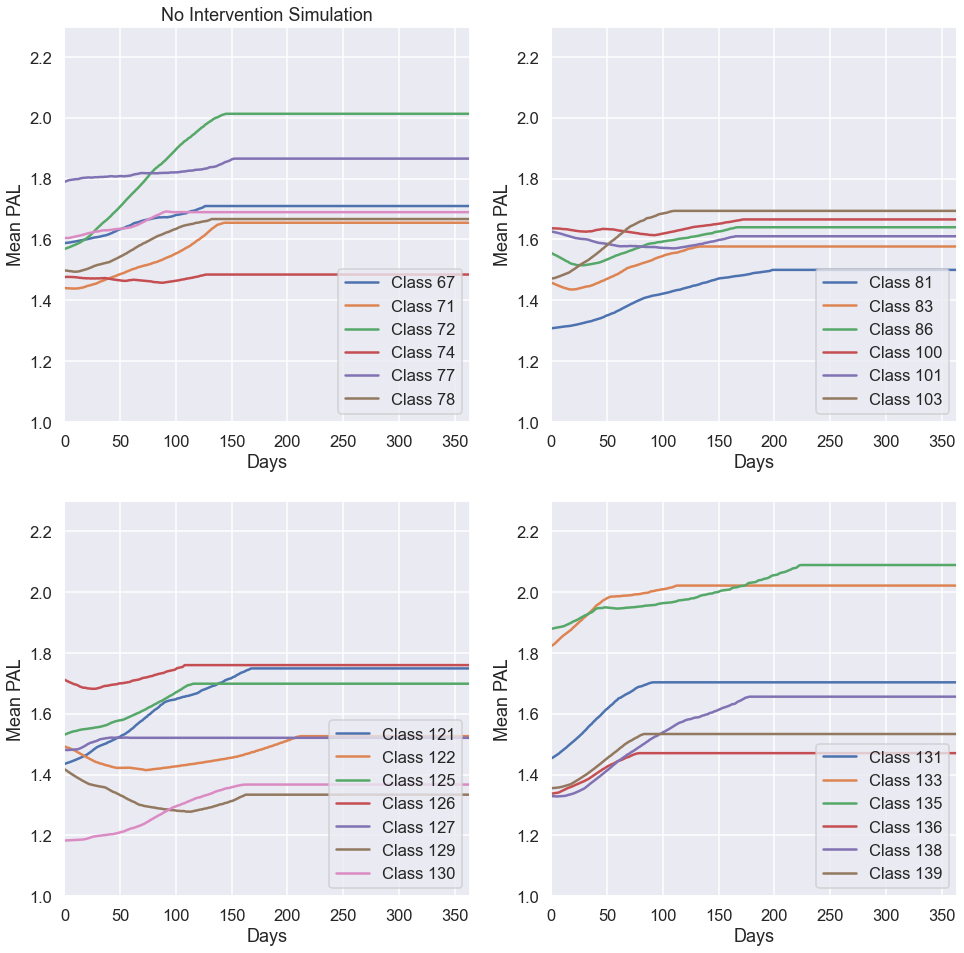

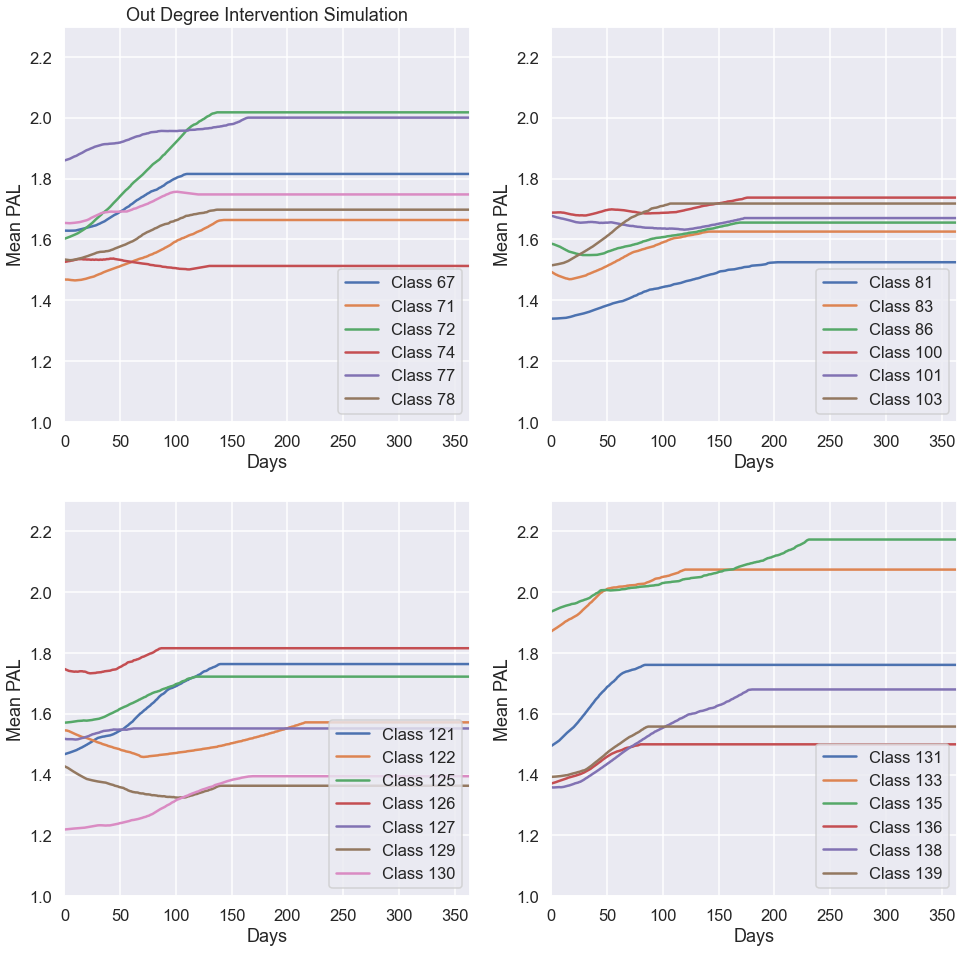

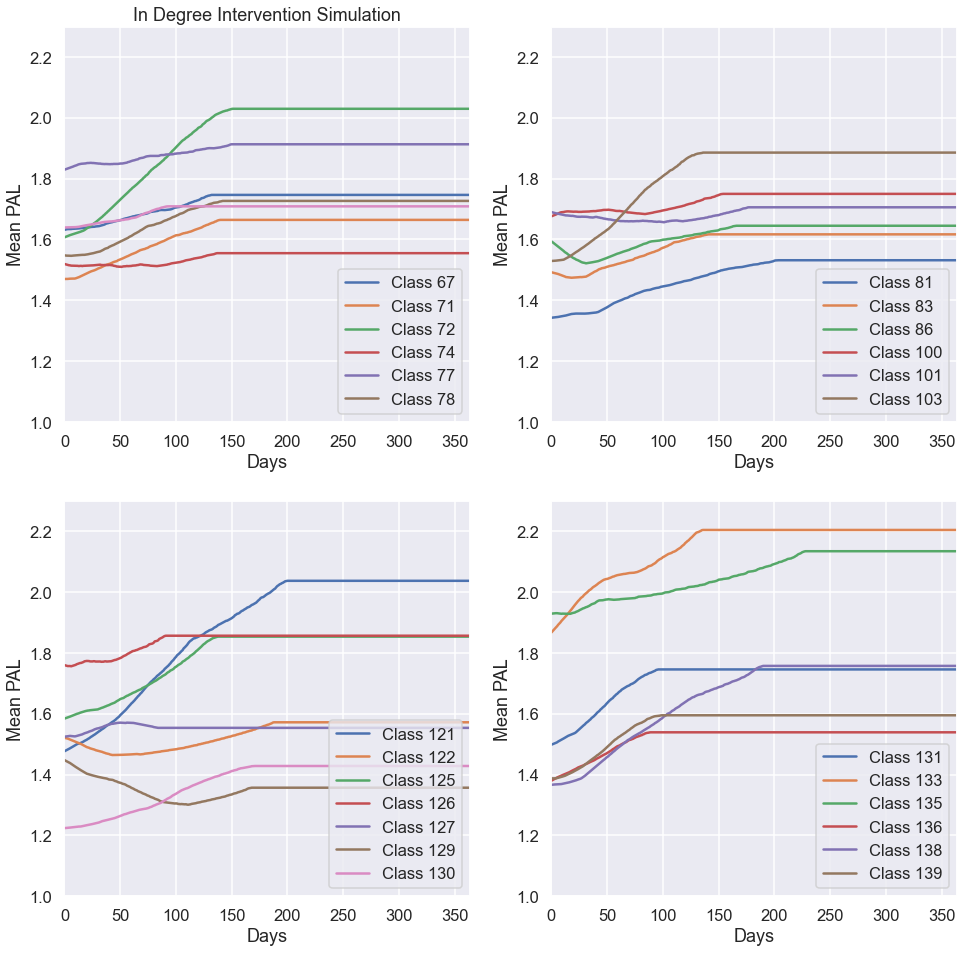

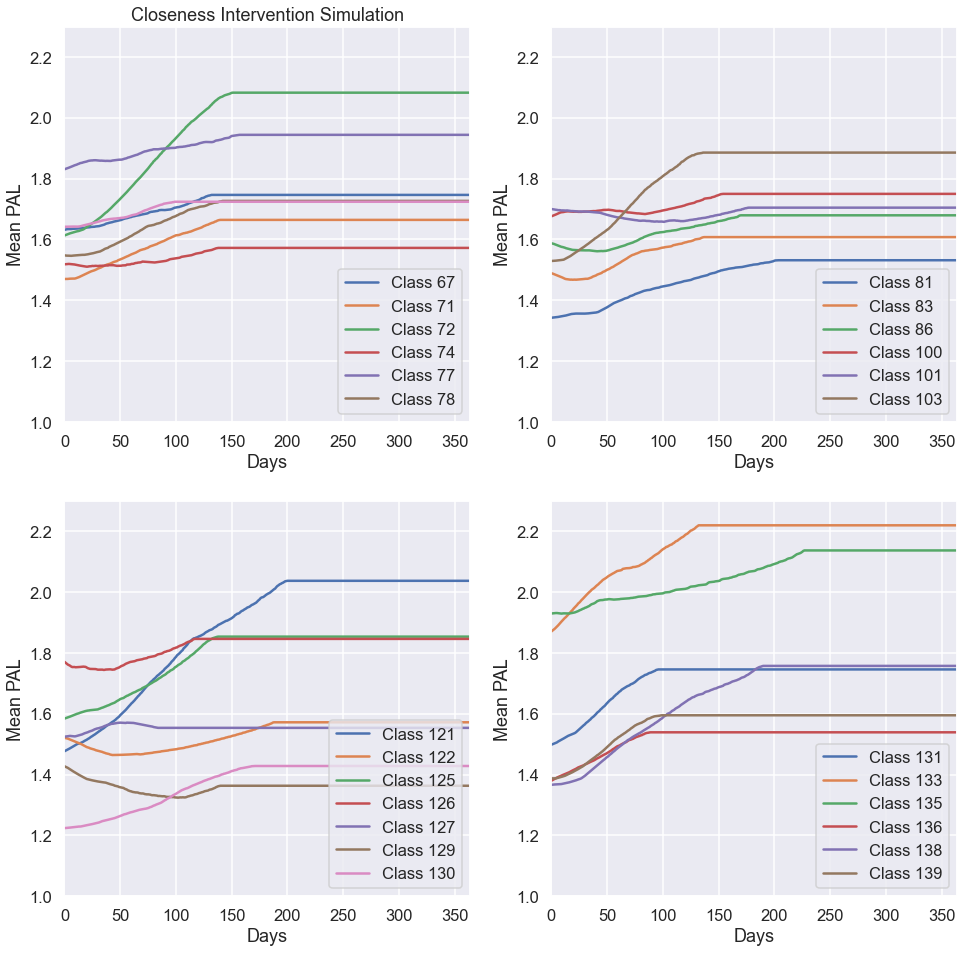

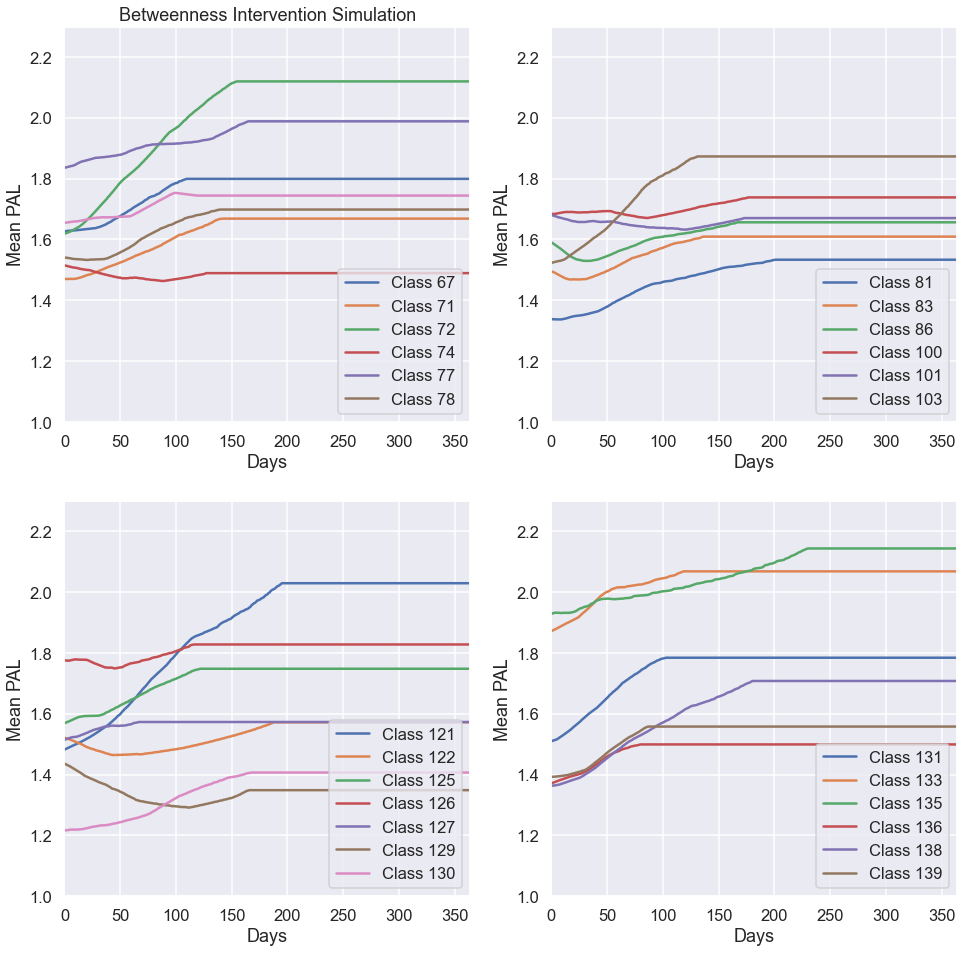

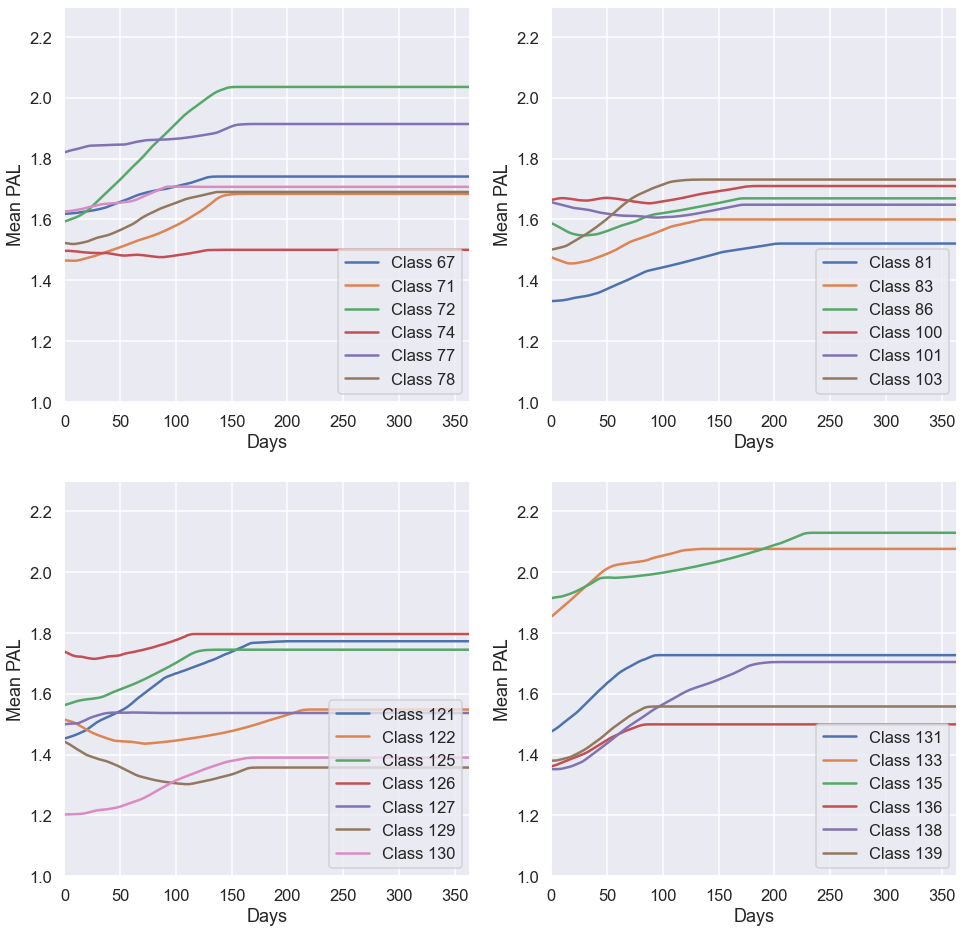

In [42]:
simulation.get_classes_intervention_comparison_plots(classes_results=df_diffusion)

Comparing Models | Class with ID 67
Comparing Models | Class with ID 71
Comparing Models | Class with ID 72
Comparing Models | Class with ID 74
Comparing Models | Class with ID 77
Comparing Models | Class with ID 78
Comparing Models | Class with ID 79
Comparing Models | Class with ID 81
Comparing Models | Class with ID 83
Comparing Models | Class with ID 86
Comparing Models | Class with ID 100
Comparing Models | Class with ID 101
Comparing Models | Class with ID 103
Comparing Models | Class with ID 121
Comparing Models | Class with ID 122
Comparing Models | Class with ID 125
Comparing Models | Class with ID 126
Comparing Models | Class with ID 127
Comparing Models | Class with ID 129
Comparing Models | Class with ID 130
Comparing Models | Class with ID 131


/Users/bojansimoski/dev/eur/ABM-PA/src/classes_analysis.py:838: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if isinstance(class1[m]['indegree'][n][p], pd.DataFrame) and not class1[m]['indegree'][n][p].empty:


Comparing Models | Class with ID 133
Comparing Models | Class with ID 135
Comparing Models | Class with ID 136
Comparing Models | Class with ID 138
Comparing Models | Class with ID 139


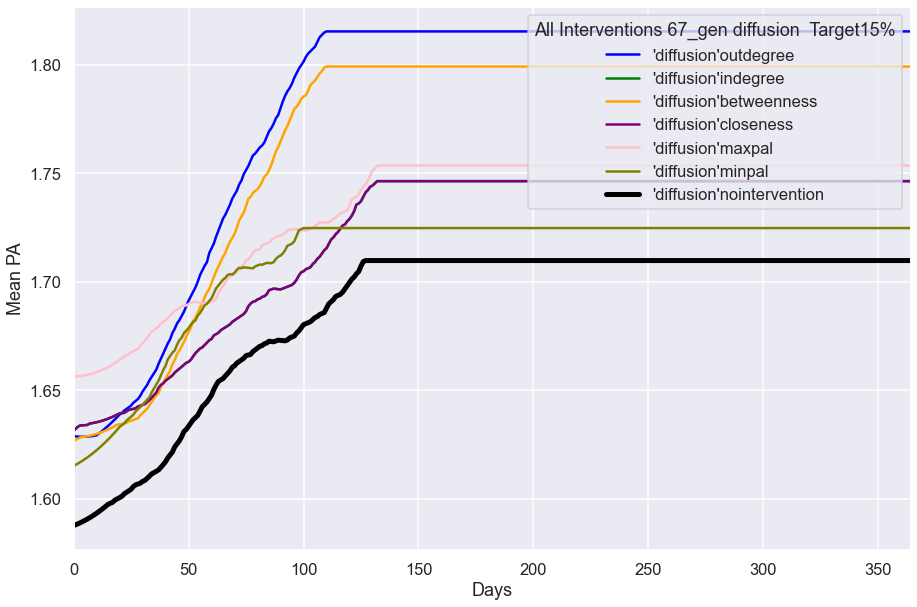

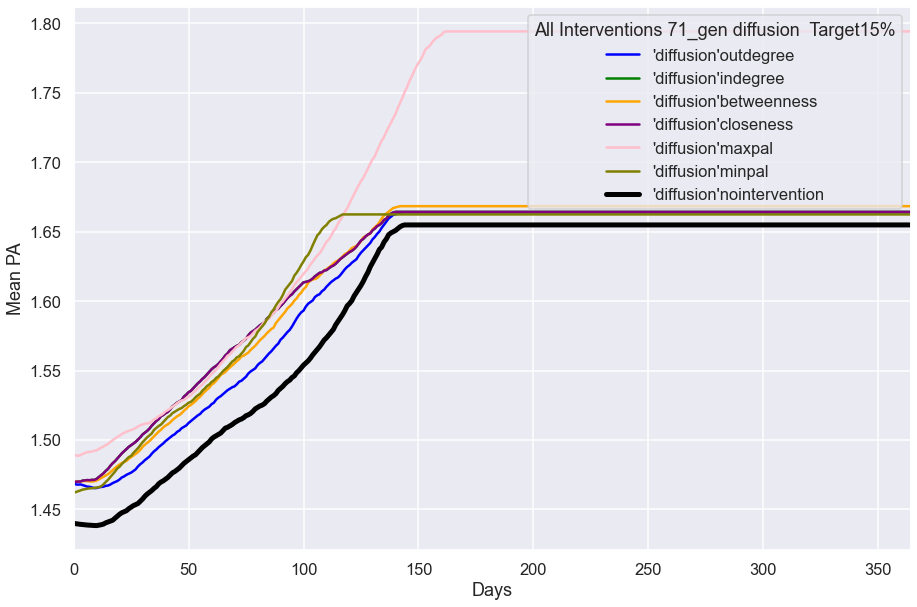

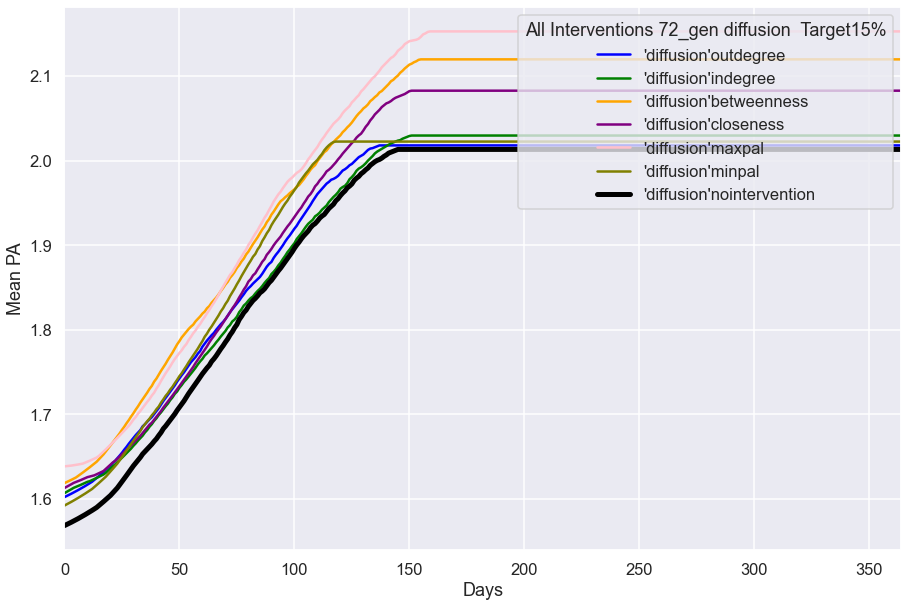

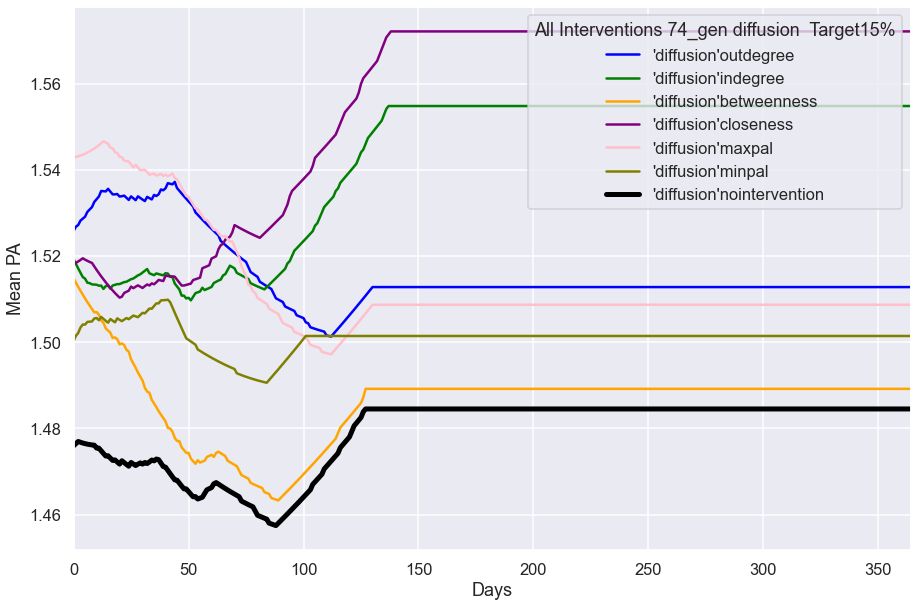

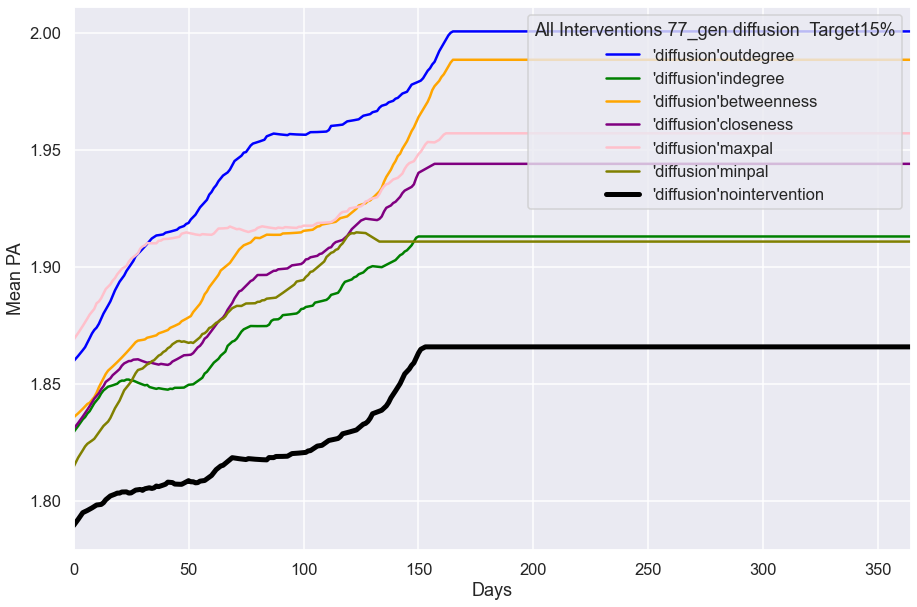

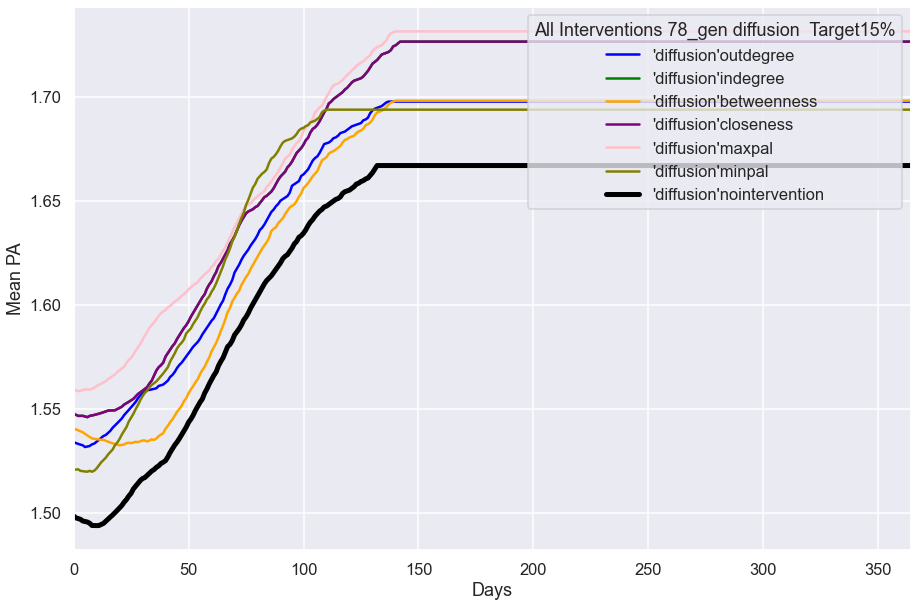

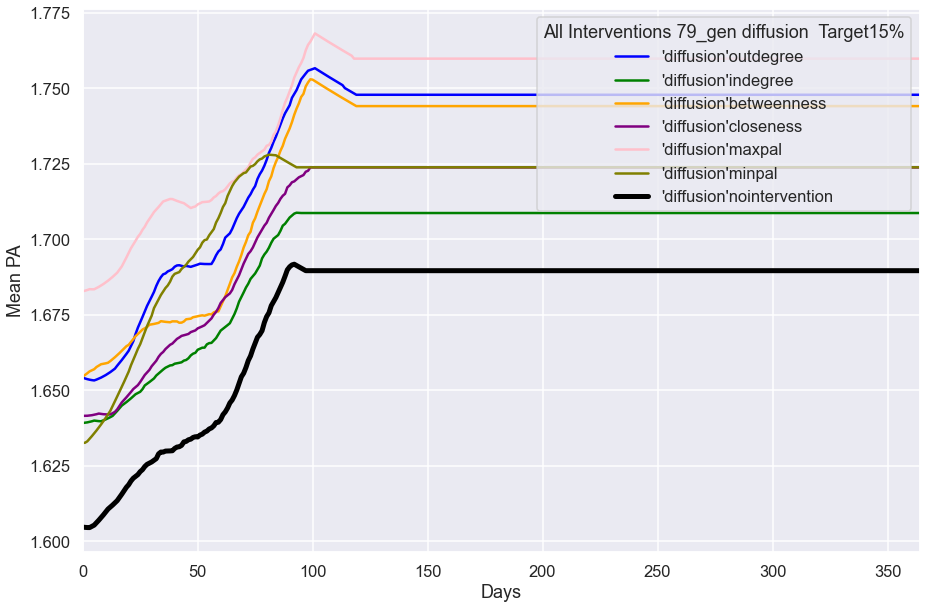

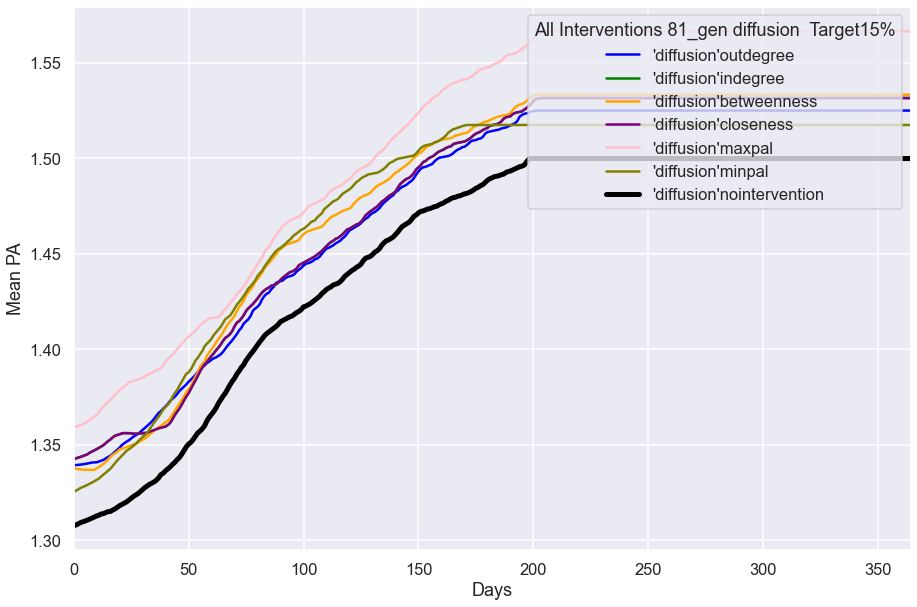

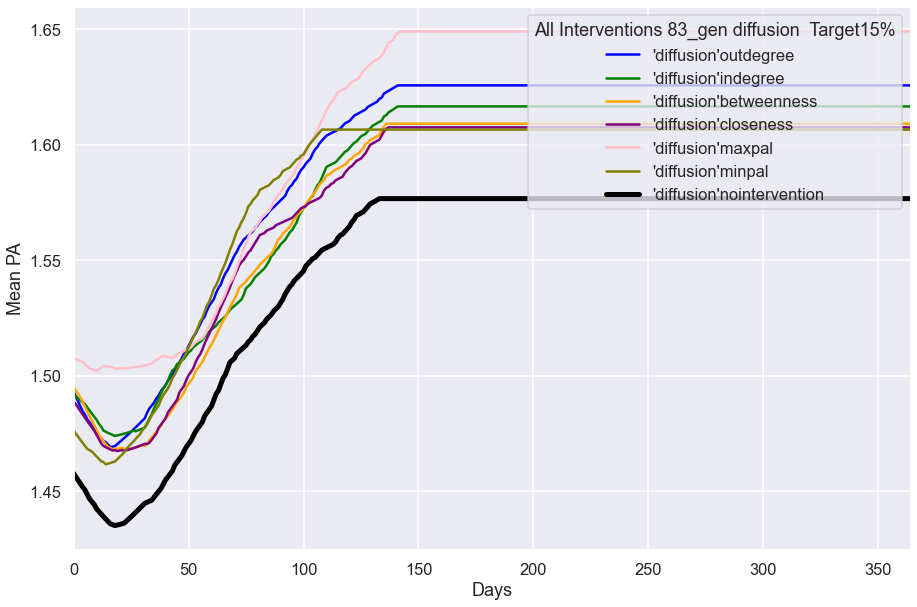

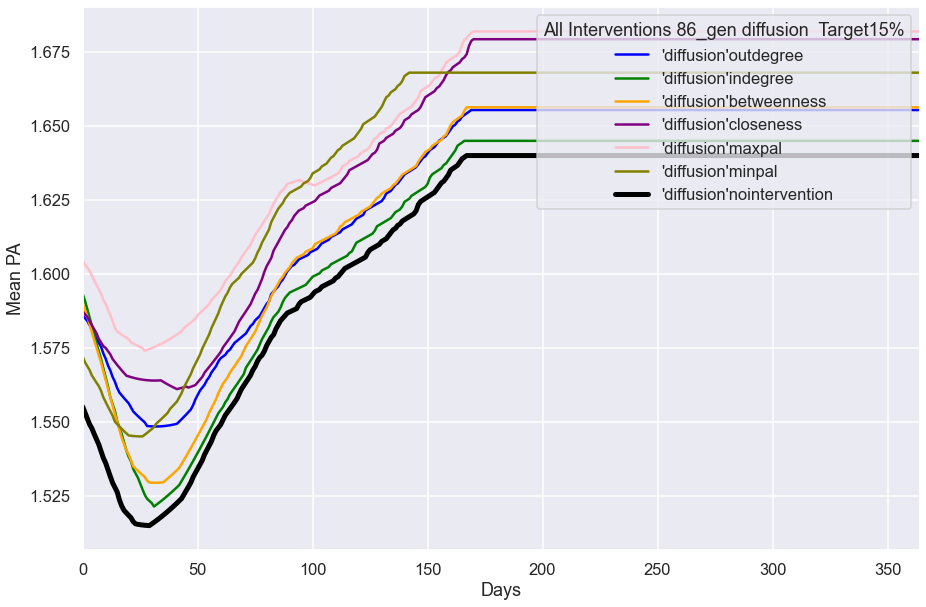

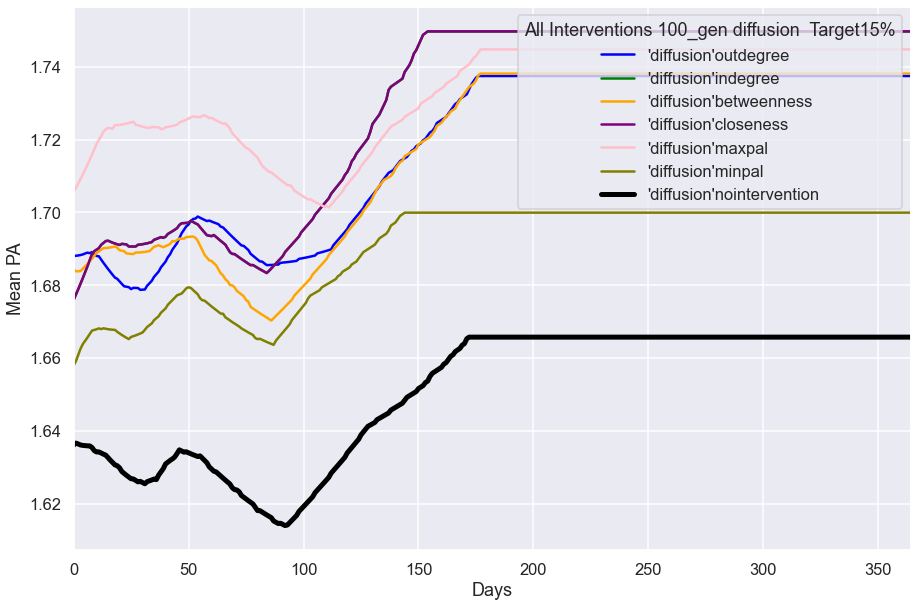

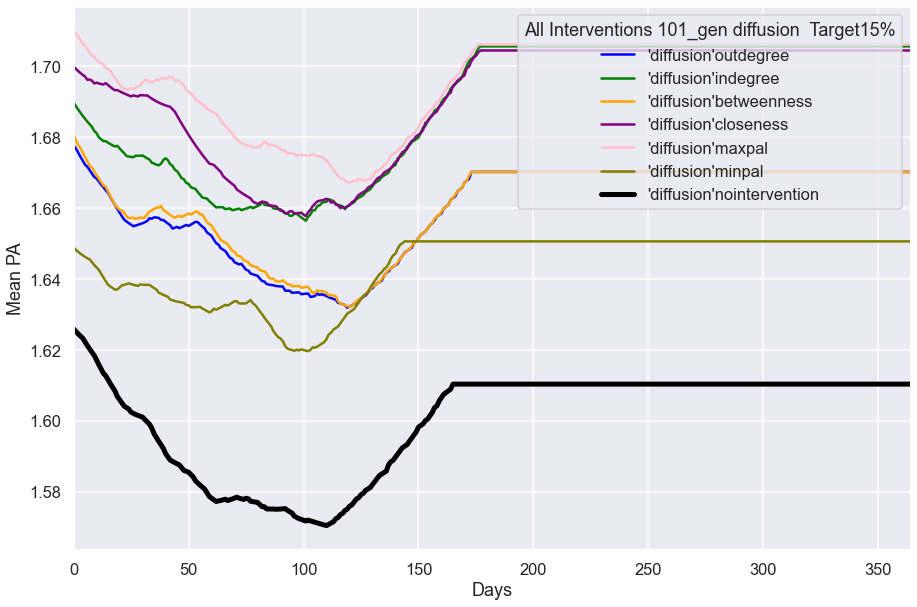

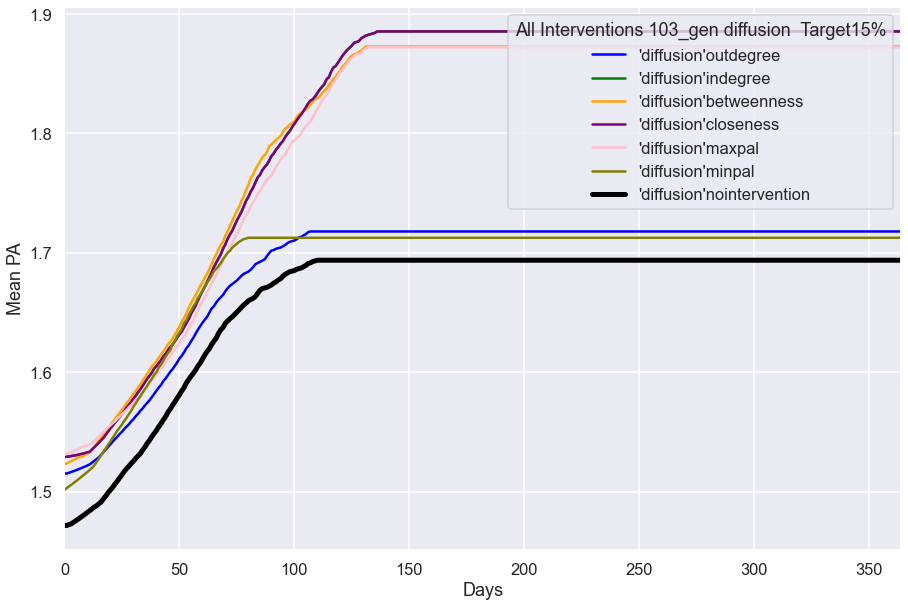

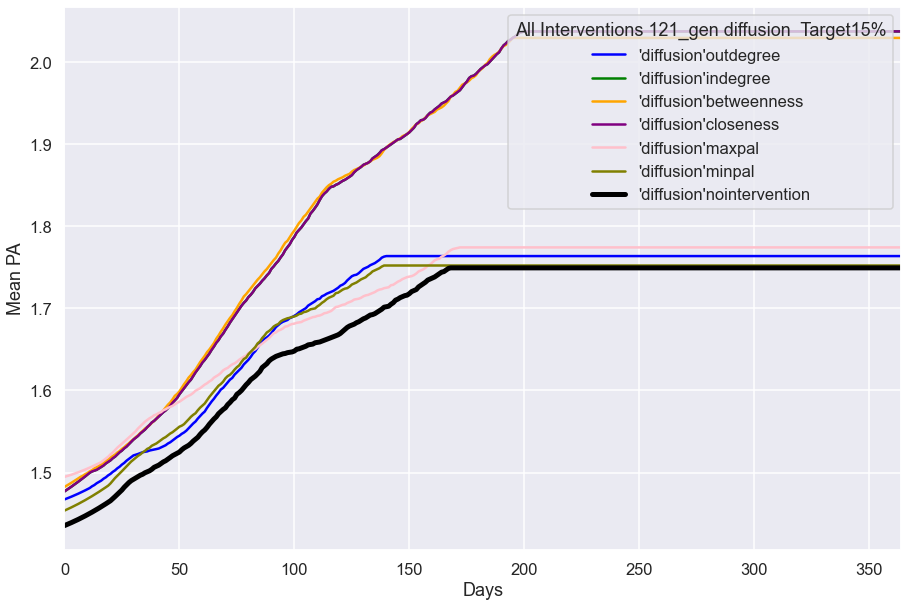

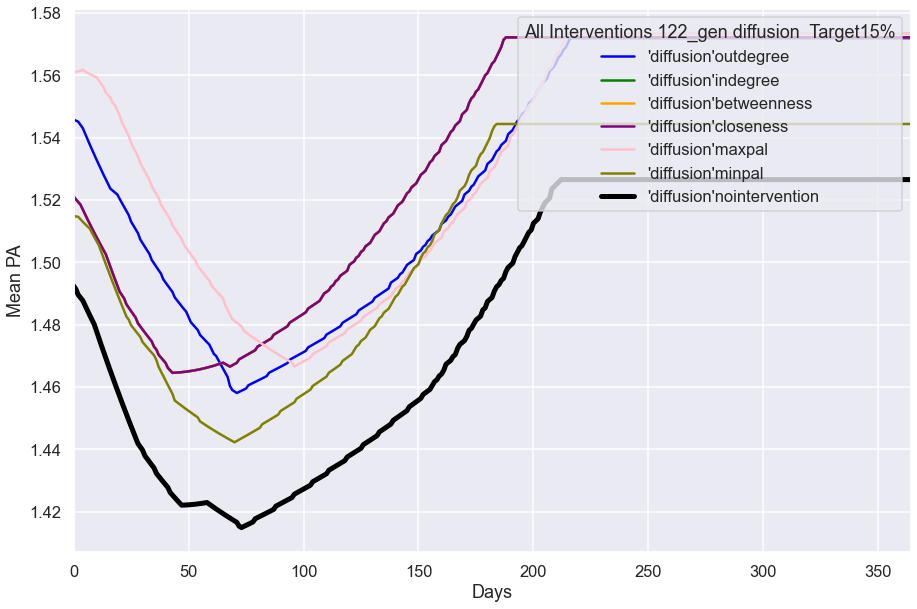

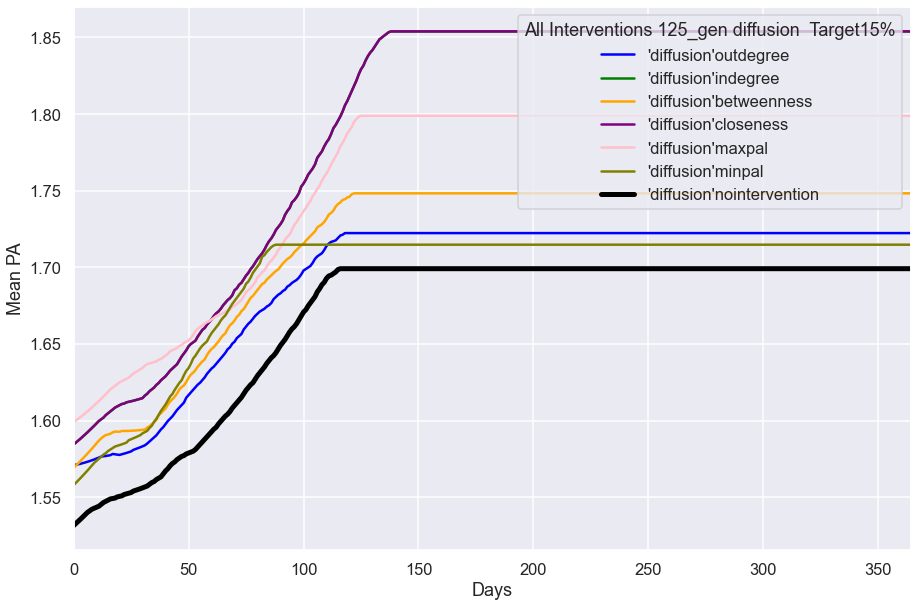

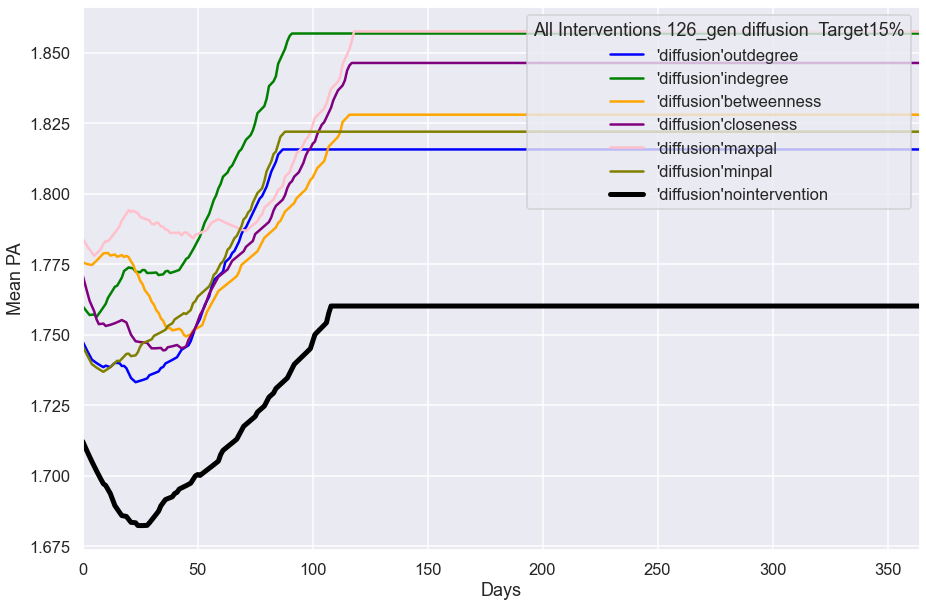

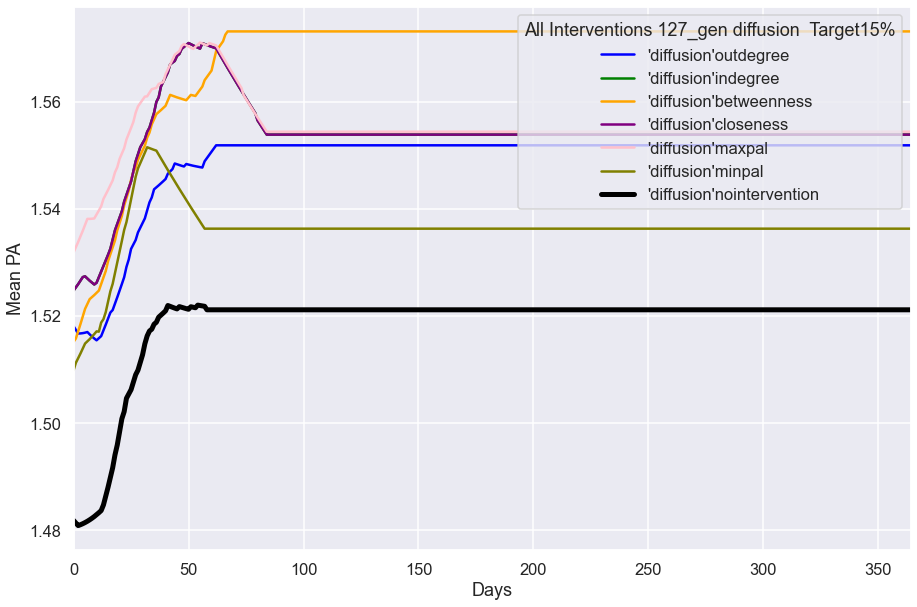

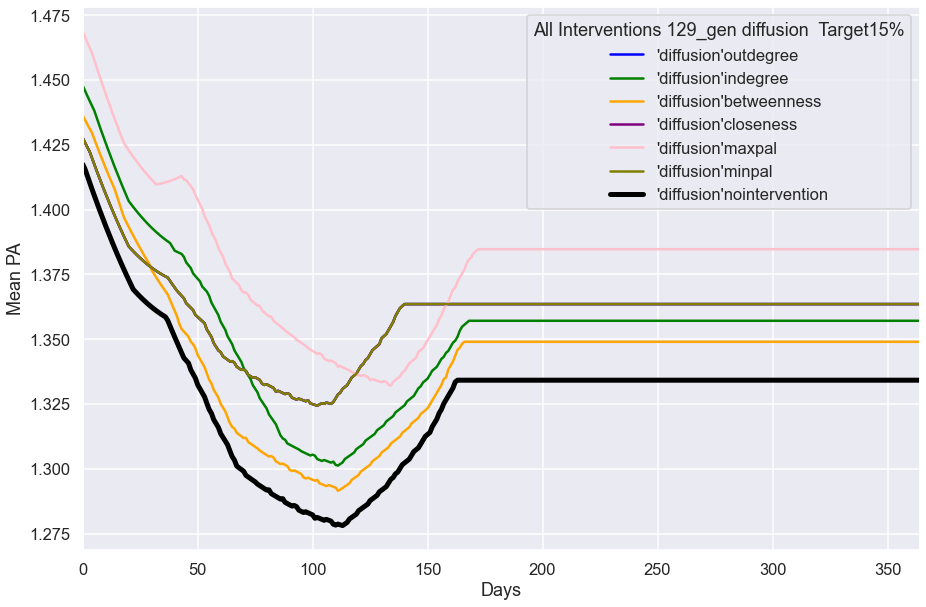

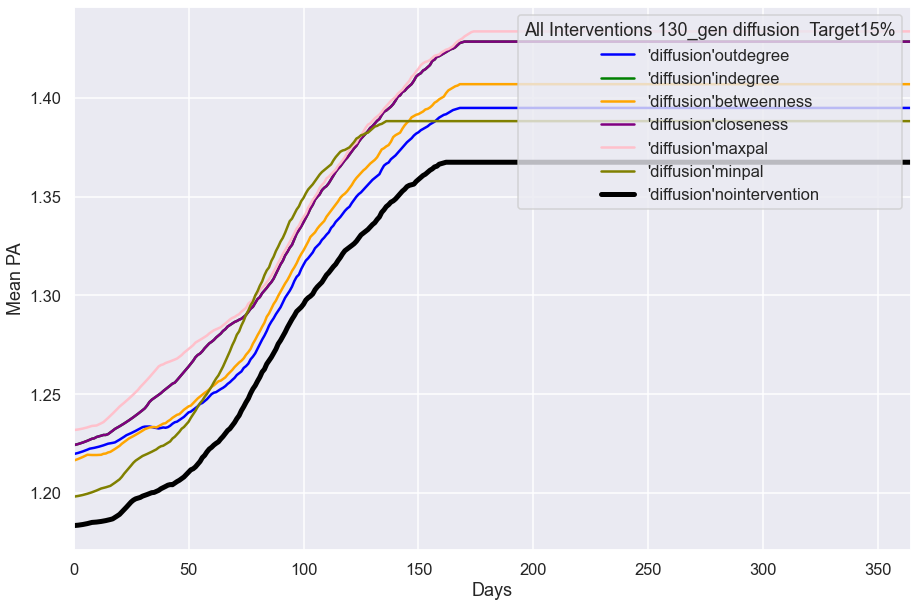

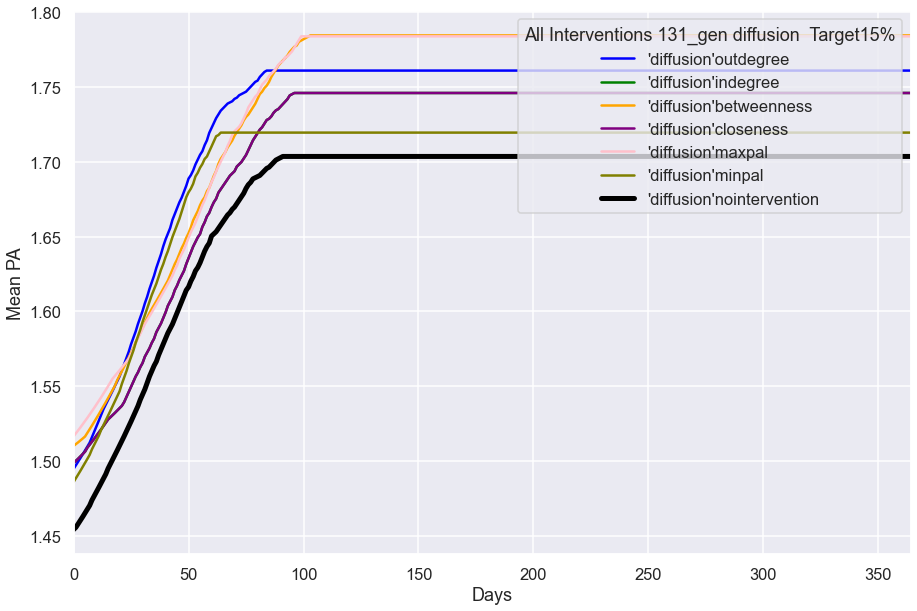

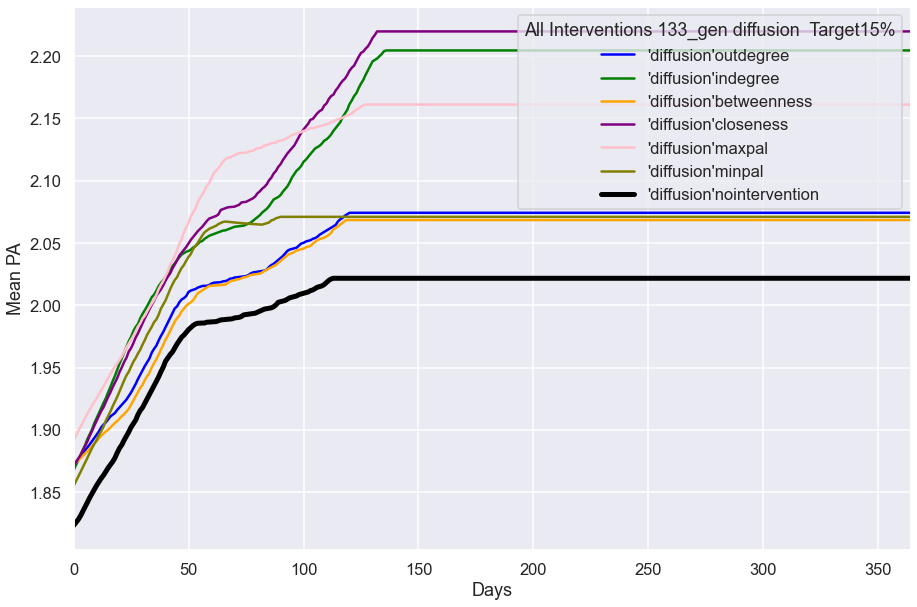

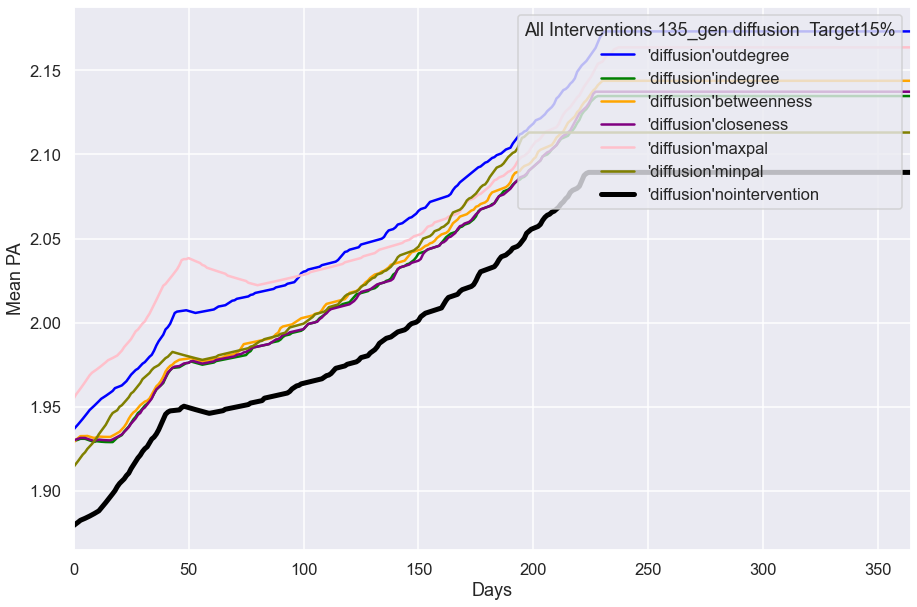

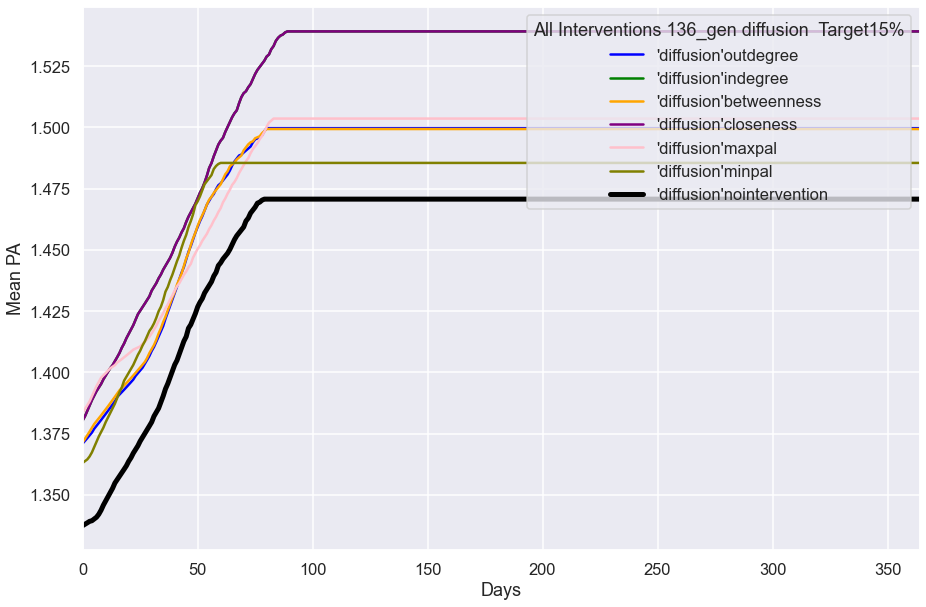

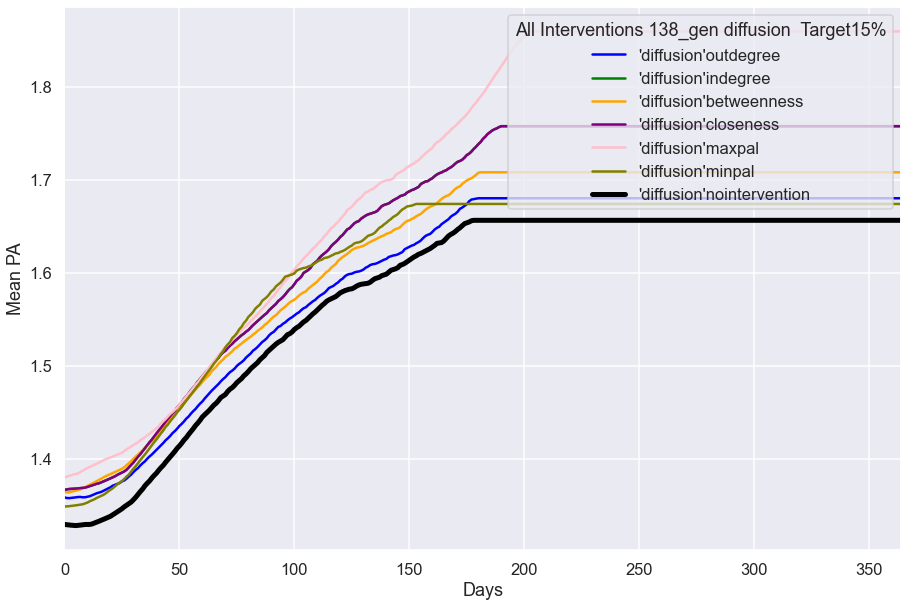

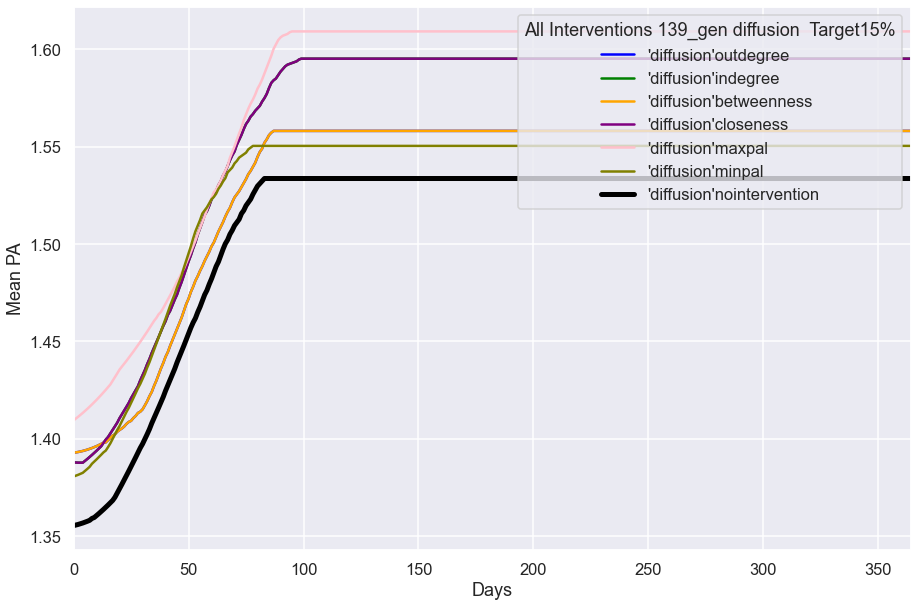

In [60]:
simulation.get_all_interventions_per_model_plots(classes_results=df_diffusion)

Avg Success Rates Interventions
11.67 closeness
11.3 indegree
9.44 outdegree
10.68 betweenness
10.41 maxpal
9.37 minpal
9.51 nointervention


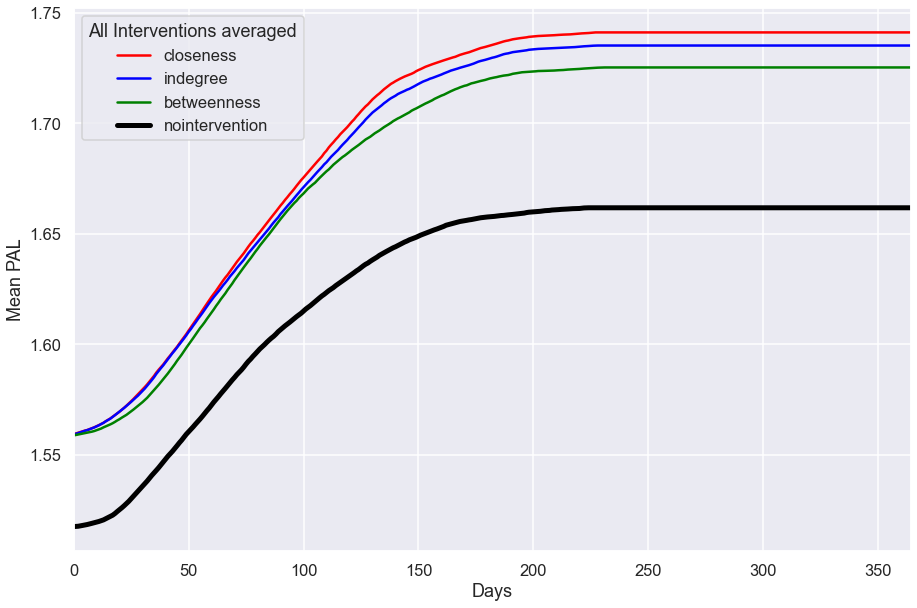

In [62]:
closeness=df_diffusion[0]['diffusion']['closeness']['gen'][15].mean(axis=1)
indegree=df_diffusion[0]['diffusion']['indegree']['gen'][15].mean(axis=1)
outdegree=df_diffusion[0]['diffusion']['outdegree']['gen'][15].mean(axis=1)
betweenness=df_diffusion[0]['diffusion']['betweenness']['gen'][15].mean(axis=1)
maxpal=df_diffusion[0]['diffusion']['maxpal']['gen'][15].mean(axis=1)
minpal=df_diffusion[0]['diffusion']['minpal']['gen'][15].mean(axis=1)
nointervention=df_diffusion[0]['diffusion']['nointervention']['gen'][15].mean(axis=1)
random=df_diffusion[0]['diffusion']['random']['gen'][15].mean(axis=1)
for i in range(1,26):
    closeness=closeness.add(df_diffusion[i]['diffusion']['closeness']['gen'][15].mean(axis=1))
    indegree=indegree.add(df_diffusion[i]['diffusion']['indegree']['gen'][15].mean(axis=1))
    outdegree=outdegree.add(df_diffusion[i]['diffusion']['outdegree']['gen'][15].mean(axis=1))
    betweenness=betweenness.add(df_diffusion[i]['diffusion']['betweenness']['gen'][15].mean(axis=1))
    maxpal=maxpal.add(df_diffusion[i]['diffusion']['maxpal']['gen'][15].mean(axis=1))
    minpal=minpal.add(df_diffusion[i]['diffusion']['minpal']['gen'][15].mean(axis=1))
    nointervention=nointervention.add(df_diffusion[i]['diffusion']['nointervention']['gen'][15].mean(axis=1))
    random=random.add(df_diffusion[i]['diffusion']['random']['gen'][15].mean(axis=1))

writer = pd.ExcelWriter('AveragedOutput.xlsx')
closeness=closeness/26
closeness.to_excel(writer,'closeness')
indegree=indegree/26
indegree.to_excel(writer,'indegree')
outdegree=outdegree/26
outdegree.to_excel(writer,'outdegree')
betweenness=betweenness/26
betweenness.to_excel(writer,'betweenness')
maxpal=maxpal/26
maxpal.to_excel(writer,'maxpal')
minpal=minpal/26
minpal.to_excel(writer,'minpal')
nointervention=nointervention/26
nointervention.to_excel(writer,'nointervention')
random=random/26
random.to_excel(writer,'random')
writer.save()

plt.figure(figsize=((15,10)))
plt.xlim(0,364)
plt.xlabel('Days')
plt.ylabel('Mean PAL')
closeness.plot(color='red',label='closeness')
indegree.plot(color='blue',label='indegree')
# outdegree.plot(color='yellow',label='outdegree')
betweenness.plot(color='green',label='betweenness')
# maxpal.plot(color='purple',label='maxpal')
# minpal.plot(color='orange',label='minpal')
nointervention.plot(style='-', linewidth=5, color='black',label='nointervention')
# random.plot(color='pink',label='random')
plt.legend(title='All Interventions averaged' )
print('Avg Success Rates Interventions')
print(repr(simulation.get_change(closeness[364],closeness[0]))+' closeness')
print(repr(simulation.get_change(indegree[364],indegree[0]))+' indegree')
print(repr(simulation.get_change(outdegree[364],outdegree[0]))+' outdegree')
print(repr(simulation.get_change(betweenness[364],betweenness[0]))+' betweenness')
print(repr(simulation.get_change(maxpal[364],maxpal[0]))+' maxpal')
print(repr(simulation.get_change(minpal[364],minpal[0]))+' minpal')
print(repr(simulation.get_change(nointervention[364],nointervention[0]))+' nointervention')

In [63]:
simulation.writeClassesInterventionToExcel(classes_results=df_diffusion)

In [67]:
# corr,pval,stats=simulation.get_correlations(dct=df_diffusion,model='diffusion')

In [48]:
# x=stats[['ROutDegreeCentralization']].values
# y=stats[['diffusion_vulnerability']].values
# plt.scatter(x,y)
# plt.xlabel("OutDegree Centralization")
# plt.ylabel("Vulnerability - Diffusion")

In [49]:
# df_to_excel(corr.round(2),filename='Correlations.xlsx',sheet='Correlations')

In [50]:
# df_to_excel(pval.round(3),filename='PVals.xlsx',sheet='PVals')

In [51]:
# start_points=indif[['ID','d0_outdegree','d0_indegree','d0_betweenness','d0_closeness','d0_nointervention','d0_maxpal']]

In [52]:
# start_points=start_points.sort_values('d0_nointervention')

In [53]:
# start_points=start_points.astype(float).round(2)

In [54]:
# end_points=indif[['ID','d364_outdegree','d364_indegree','d364_betweenness','d364_closeness','d364_nointervention','d364_maxpal']]

In [55]:
# end_points=end_points.sort_values('d364_nointervention')

In [68]:
# df_to_excel(start_points,filename='start_points.xlsx',sheet='start_points')

In [ ]:
# get_classes_intervention_comparison_plots(classes_results=df_diffusion,save_png=True, create_doc=True,model=['diffusion'],label=['gen'],percent=[20])

In [ ]:
# xls_file = pd.ExcelFile('Results/ClassesSummary/networkanalysis_gen_final.xlsx')
# net = xls_file.parse('Class')

In [ ]:
# net[['ID','RClosenessCentralization']].sort_values('RClosenessCentralization')

In [ ]:
# indif

In [ ]:
# corr.round(2)

In [ ]:
# pval.round(3)

In [ ]:
#         x=stats[['ROutDegreeCentralization']].values
#         y=stats[['diffusion_vulnerability']].values
#         df = pd.DataFrame()
#         x=list(chain.from_iterable(x.tolist()))
#         y=list(chain.from_iterable(y.tolist()))
#         df['Out Degree Centralization']=x
#         df['Vulnerability']=y

In [ ]:
# g = sns.jointplot("Out Degree Centralization", "Vulnerability", data=df, kind="reg", size=8)

In [ ]:
# x=stats[['ROutDegreeCentralization']].values
# y=stats[['diffusion_noint']].values
# df = pd.DataFrame()
# x=list(chain.from_iterable(x.tolist()))
# y=list(chain.from_iterable(y.tolist()))
# df['Out Degree Centralization']=x
# df['No Intervention']=y
# g = sns.jointplot("Out Degree Centralization", "No Intervention", data=df, kind="reg", size=8)

In [ ]:
# # heatmap stuff
# hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)

In [ ]:
# hm=hm.drop(hm.index[len(hm)-1])

In [ ]:
# df_to_excel(hm,filename='heatmap.xlsx',sheet='heatmap')

In [ ]:
# hm=pd.ExcelFile('heatmap.xlsx',sheet_name='heatmap')
# hm=hm.parse('heatmap')

In [ ]:
# hm

In [ ]:
# # hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)
# # hm=hm.drop(hm.index[12])
# # df_to_excel(hm,filename='heatmap.xlsx',sheet='heatmap')
# hm=pd.ExcelFile('heatmap.xlsx',sheet_name='heatmap')
# hm=hm.parse('heatmap')
# hm=hm.reset_index()
# cls=(np.asarray(hm['ID'])).reshape(5,5)
# perc=(np.asarray(hm['perc_total'])).reshape(5,5)
# result=hm.pivot(index='Yrows',columns='Xrows',values='perc_total')
# labels=(np.asarray(["Class {0} \n \n {1:.2f}%".format(c,p)
#                   for c,p in zip(cls.flatten(),perc.flatten())])
#        ).reshape(5,5)
# fig, ax =plt.subplots(figsize=(15,10))
# title= "Success Rates per Class"
# plt.title(title,fontsize=18)
# ttl=ax.title
# ttl.set_position([0.5,1.05])
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis('off')
# sns.heatmap(result,annot=labels,annot_kws={"size": 16},fmt="",cmap="Blues",linewidths=0.30,ax=ax)
# plt.show()

In [ ]:
# result

In [ ]:
# cls

In [ ]:
# perc

In [ ]:
# result=hm.pivot(index='Yrows',columns='Xrows',values='perc_total')

In [ ]:
# result

In [ ]:
# labels=(np.asarray(["Class {0} \n \n {1:.2f}%".format(c,p)
#                   for c,p in zip(cls.flatten(),perc.flatten())])
#        ).reshape(5,5)

In [ ]:
# labels

In [ ]:
# # heatmap stuff
# hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)
# hm=hm.drop(hm.index[len(hm)-1])
# df_to_excel(hm,filename='heatmap.xlsx',sheet='heatmap')
# hm=pd.ExcelFile('heatmap.xlsx',sheet_name='heatmap')
# hm=hm.parse('heatmap')
# cls=(np.asarray(hm['ID'])).reshape(5,5)
# perc=(np.asarray(hm['perc_total'])).reshape(5,5)
# result=hm.pivot(index='Yrows',columns='Xrows',values='perc_total')
# labels=(np.asarray(["Class {0} \n \n {1:.2f}%".format(c,p)
#                   for c,p in zip(cls.flatten(),perc.flatten())])
#        ).reshape(5,5)
# fig, ax =plt.subplots(figsize=(15,10))
# title= "Success Rates per Class"
# plt.title(title,fontsize=18)
# ttl=ax.title
# ttl.set_position([0.5,1.05])
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis('off')
# sns.heatmap(result,annot=labels,annot_kws={"size": 16},fmt="",cmap="Blues",linewidths=0.30,ax=ax)
# plt.show()

In [ ]:
# hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)

In [ ]:
# hm

In [ ]:
# get_classes_intervention_comparison_plots(classes_results=df_diffusion,model=['diffusion'], label=['gen'], percent=[20], intervention=['centrality', 'high_risk', 'vulnerability'])

In [ ]:
# x=stats[['ROutDegreeCentralization']].values
# y=stats[['diffusion_high_risk']].values
# df = pd.DataFrame()
# x=list(chain.from_iterable(x.tolist()))
# y=list(chain.from_iterable(y.tolist()))
# df['Out Degree Centralization']=x
# df['High Risk Intervention']=y
# sns.set_style("white")
# sns.set_context("talk", font_scale=1.2,rc={"lines.linewidth": 2.5})
# g = sns.jointplot("Out Degree Centralization", "High Risk Intervention", data=df, kind="reg", size=8)
# g.savefig('myimage.png', format='png', dpi=1200)

In [ ]:
# graphGen

In [ ]:
# get_class_graphs(graph=graphGen,writeToFile=True)

In [ ]:
# get_df_class_children_topology_analysis(graphGen=[graphGen],generateGephiFiles=True)

In [ ]:
# df_diffusion

In [ ]:
# nx.draw(testGraph)
# plt.show()

In [ ]:
# diffuse_behavior_PA(testGraph)